In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


#read community file date
com = pd.read_csv("community/FB_groups_States_abortion.csv", sep= ",")
com['type'] = 'abortion'

df = pd.read_csv("community/FB_groups_States_climate_change.csv", sep=",")
df['type'] ='climate'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_coronavirus.csv",sep=",")
df['type'] ='covid'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_crime.csv", sep= ",")
df['type'] = 'crime'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_economy.csv", sep=",")
df['type'] = 'economy'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_gun_policy.csv", sep=",")
df['type'] = 'gun'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_immigration.csv", sep=",")
df['type']='immigration'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_racism.csv", sep=",")
df['type'] = 'racism'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_supreme_court.csv", sep=",")
df['type'] ='supreme'
com = com.append(df, ignore_index=True)

com['group'] = 'community'

In [2]:
len(com)

24949

In [3]:
#read political file date
pol = pd.read_csv("political/Topics_FB_Political_Posts_per_partyabortion.csv", sep= ",")
pol['type'] = 'abortion'

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyclimate_change.csv", sep=",")
df['type'] ='climate'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partycoronavirus.csv",sep=",")
df['type'] ='covid'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partycrime.csv", sep= ",")
df['type'] = 'crime'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyeconomy.csv", sep=",")
df['type'] = 'economy'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partygun_policy.csv", sep=",")
df['type'] = 'gun'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyimmigration.csv", sep=",")
df['type']='immigration'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyracism.csv", sep=",")
df['type'] = 'racism'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partysupreme_court.csv", sep=",")
df['type'] ='supreme'
pol = pol.append(df, ignore_index=True)

pol['group'] = 'political'

In [4]:
len(pol)

4969

In [5]:
#read news file date
new = pd.read_csv("news/FB_groups_News_Media_Outlets_abortion.csv", sep= ",")
new['type'] = 'abortion'

df = pd.read_csv("news/FB_groups_News_Media_Outlets_climate_change.csv", sep=",")
df['type'] ='climate'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_coronavirus.csv",sep=",")
df['type'] ='covid'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_crime.csv", sep= ",")
df['type'] = 'crime'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_economy.csv", sep=",")
df['type'] = 'economy'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_gun_policy.csv", sep=",")
df['type'] = 'gun'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_immigration.csv", sep=",")
df['type']='immigration'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_racism.csv", sep=",")
df['type'] = 'racism'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_supreme_court.csv", sep=",")
df['type'] ='supreme'
new = new.append(df, ignore_index=True)

new['group'] = 'news'

In [6]:
len(new)

57977

In [7]:
#remove NaN values in page name and replace with name
pol.rename(columns = {'Group Name': 'name'}, inplace=True)
new.rename(columns = {'Page Name': 'name'}, inplace=True)
com.name.fillna(com['Group Name'], inplace = True)

In [8]:
#transfer political values to community
cond = []

temp = com.name.tolist()
for x in temp:
    if 'Trump' in x:
        cond.append(x)
    if 'Democr' in x:
        cond.append(x)
    if 'Repub' in x:
        cond.append(x)
    if 'repub' in x:
        cond.append(x)
        
print(len(cond))
#v is index
v = []
for x in range(len(com['name'])):
    if com['name'][x] in cond:
        v.append(x)
print 

print(len(v))
for i in v:
    pol = pol.append(com.iloc[i])

com.drop(
    labels = v,
    axis =0,
    inplace=True
)

1104
1104


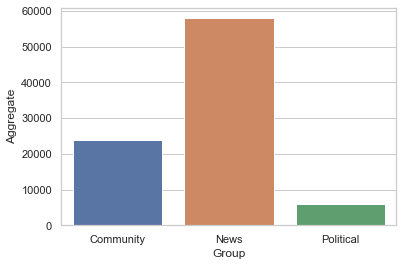

In [9]:

#total number of posts
data = [['Community', len(com)], ['News', len(new)], ['Political', len(pol)]]
df = pd.DataFrame(data, columns = ['Group', 'Aggregate'])
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Group", y ="Aggregate", data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

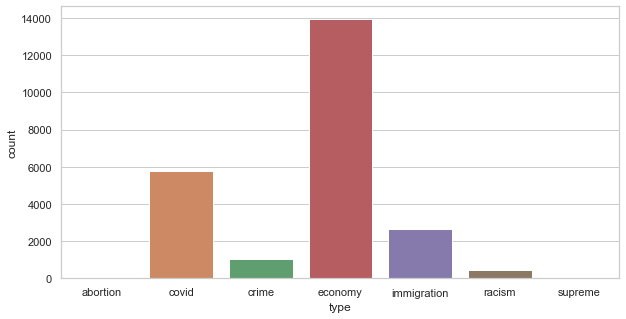

In [10]:
sns.set_theme(style="whitegrid")
fig_dims=(10, 5)
fig, ax = plt.pyplot.subplots(figsize=fig_dims)
sns.countplot(x='type', ax=ax, data=com)

<AxesSubplot:xlabel='type', ylabel='count'>

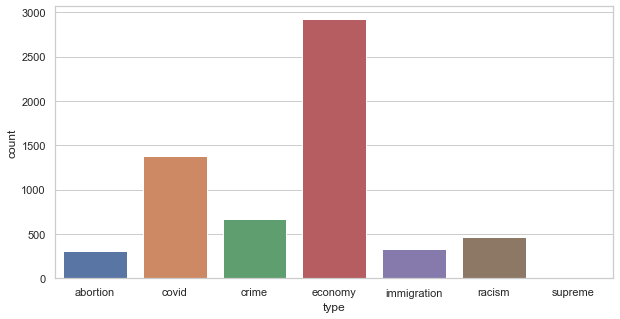

In [11]:
sns.set_theme(style="whitegrid")
fig_dims=(10, 5)
fig, ax = plt.pyplot.subplots(figsize=fig_dims)
sns.countplot(x='type', ax=ax, data=pol)

<AxesSubplot:xlabel='type', ylabel='count'>

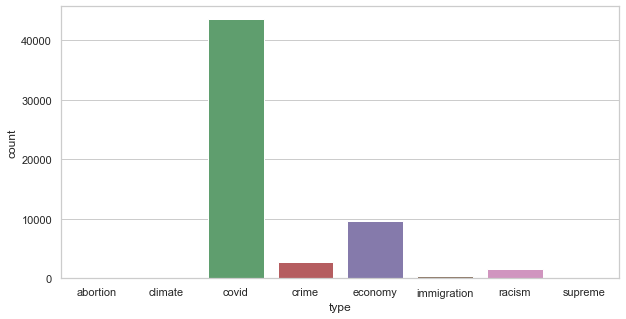

In [12]:
sns.set_theme(style="whitegrid")
fig_dims=(10, 5)
fig, ax = plt.pyplot.subplots(figsize=fig_dims)
sns.countplot(x='type', ax=ax, data=new)

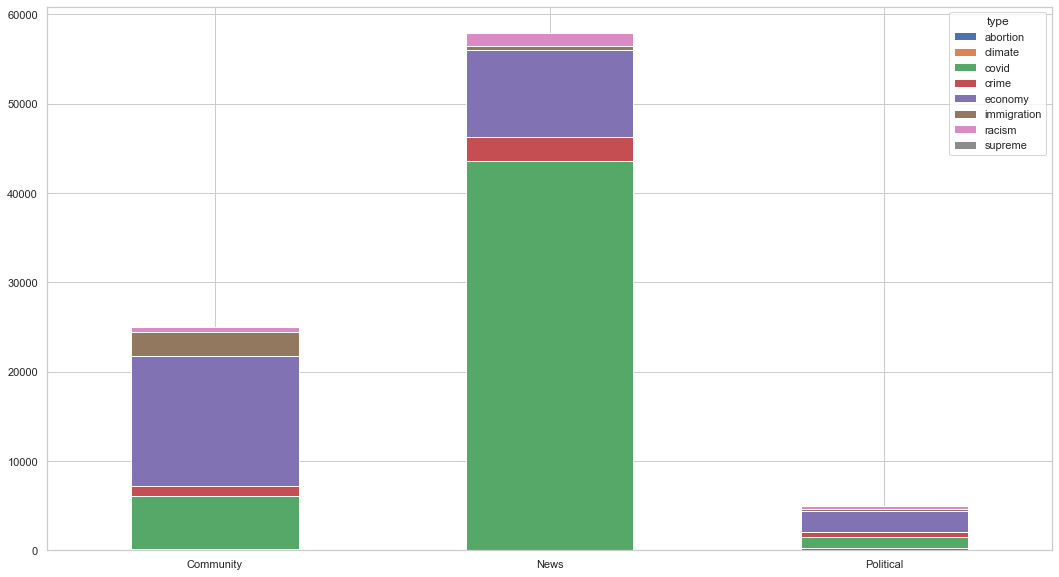

In [13]:
#x = group, type, number
t = com
t = t.append(pol, ignore_index=True)
t = t.append(new, ignore_index=True)
t_plot = t.groupby(['group','type']).size().unstack(level=-1).reset_index()
fig_dims=(18, 10)
fig, ax = plt.pyplot.subplots(figsize=fig_dims)
q = t_plot.plot.bar(ax=ax, stacked=True)
q.set_xticklabels(('Community', 'News', 'Political'), rotation=360)
plt.style.use('ggplot')

In [14]:
print('Community')
print(com.groupby(['type']).size())
print('Political')
print(pol.groupby(['type']).size())
print('News')
print(new.groupby(['type']).size())

Community
type
abortion          58
covid           5770
crime           1020
economy        13939
immigration     2638
racism           419
supreme            1
dtype: int64
Political
type
abortion        311
covid          1375
crime           663
economy        2921
immigration     327
racism          467
supreme           9
dtype: int64
News
type
abortion          79
climate            2
covid          43537
crime           2694
economy         9674
immigration      451
racism          1535
supreme            5
dtype: int64


In [15]:
len(t)

87895

In [16]:
namtype = t.reset_index()[['name','type', 'group']]

In [17]:
namtype.head()

,name,type,group
0,Hispanos en West Palm Beach FL,abortion,community
1,Hispanos en West Palm Beach FL,abortion,community
2,SAN BERNARDINO SWAPMEET LATINO,abortion,community
3,Ticos en New Jersey,abortion,community
4,Ticos en New Jersey,abortion,community


In [18]:
p = namtype.groupby(['name', 'type','group']).size()

In [19]:
namtype.groupby(['name', 'type', 'group']).size().tail()

name                       type         group    
☀️ Latinos en Miami 🌴      immigration  community    31
🇭🇳Hondureños en Houston🇭🇳  covid        community    25
                           crime        community     5
                           economy      community    22
                           immigration  community     5
dtype: int64

In [20]:
print(p.tail())

name                       type         group    
☀️ Latinos en Miami 🌴      immigration  community    31
🇭🇳Hondureños en Houston🇭🇳  covid        community    25
                           crime        community     5
                           economy      community    22
                           immigration  community     5
dtype: int64


In [21]:
print(len(p))

3395


In [22]:
print(p.head())

name                        type     group    
"ARGENTINOS EN MIAMI"       covid    community    19
                            economy  community    27
                            racism   community     1
"HISPANOS EN PENNSYLVANIA"  covid    community     1
                            economy  community     3
dtype: int64


In [23]:
type(p)

pandas.core.series.Series

In [24]:
df = p.rename(None).to_frame()

In [25]:
df.head()

0
name                       type    group        
"ARGENTINOS EN MIAMI"      covid   community  19
                           economy community  27
                           racism  community   1
"HISPANOS EN PENNSYLVANIA" covid   community   1
                           economy community   3

In [26]:
df.tail()

0
name                      type        group        
☀️ Latinos en Miami 🌴     immigration community  31
🇭🇳Hondureños en Houston🇭🇳 covid       community  25
                          crime       community   5
                          economy     community  22
                          immigration community   5

In [27]:
n = [] #hold names
total = [] #hold total politic posts
topics = [] #hold how many different topics
typ = [] #hold math for how many different topics
#row is total
#index is name, type
for index, row in df.iterrows():
    #add a name with first value and number of topics equals to 1
    #if name not in name list
    if index[0] not in n:
        #append name to name list
        n.append(index[0])
        #total number of posts regarding a political post
        total.append(row[0])
        #create a list of total all political topics covered
        topics.append(1)
        #math for different types
        typ.append(index[-1])
    else:
        #get index for name in list
        i = n.index(index[0])
        topics[i]= topics[i]+1
        total[i] = total[i] + row[0]

total_type = pd.DataFrame({
    'name': n,
    'total political posts': total,
    'total topics covered': topics,
    'group': typ
})

In [28]:
total_type.head()

,name,total political posts,total topics covered,group
0,"""ARGENTINOS EN MIAMI""",47,3,community
1,"""HISPANOS EN PENNSYLVANIA""",4,2,community
2,+ Cubanos en Miami 🇨🇺,222,5,community
3,305 Latinos for BIDEN,47,4,political
4,47 ABC,98,4,news


<AxesSubplot:xlabel='total political posts', ylabel='total topics covered'>

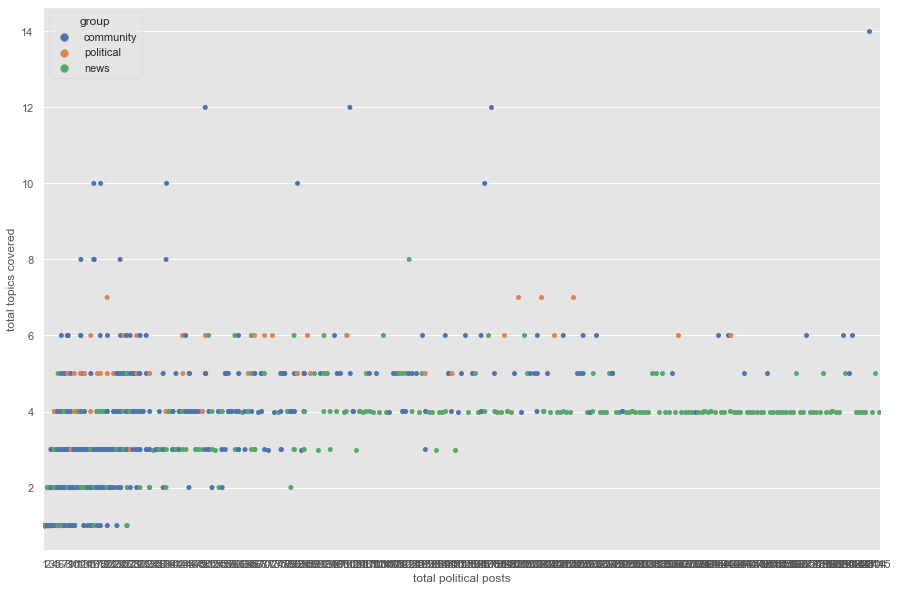

In [29]:
size = (15,10)
fig, ax = plt.pyplot.subplots(figsize = size)
sns.stripplot(ax=ax, data=total_type,
                x="total political posts",
                y="total topics covered",
                hue="group", palette = 'deep')

In [30]:
total_type['group'].value_counts()

community    575
news         380
political    118
Name: group, dtype: int64

In [31]:
print('finished')

finished


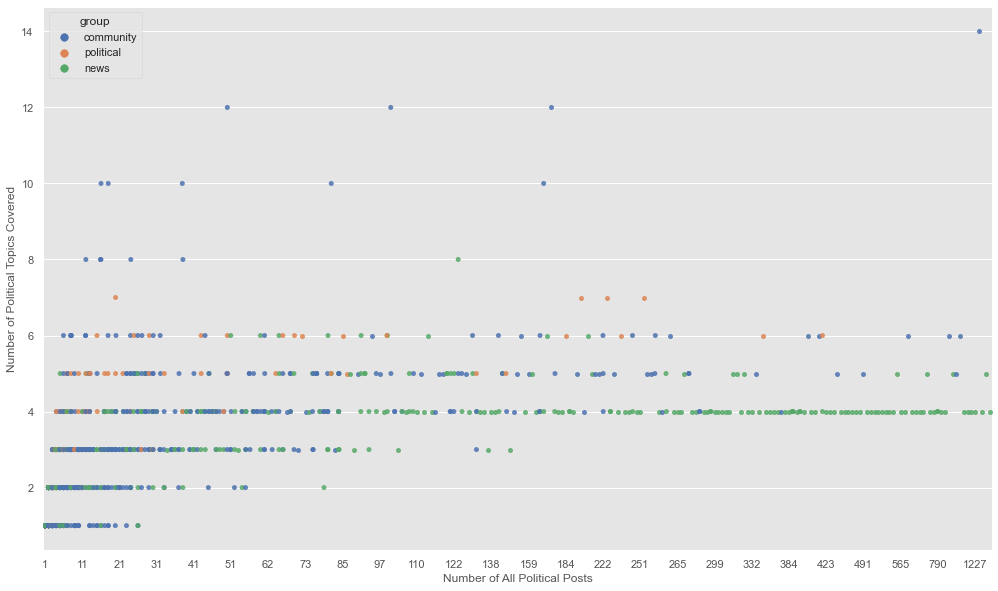

In [32]:
size = (17,10)
fig, ax = plt.pyplot.subplots(figsize = size)
g = sns.stripplot(ax=ax, data=total_type,
                x="total political posts",
                y="total topics covered",
                hue="group", palette = 'deep', alpha=.85)

plt.pyplot.xlabel('Number of All Political Posts')
plt.pyplot.ylabel('Number of Political Topics Covered')

for ind,label in enumerate(g.get_xticklabels()):
    if ind %10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

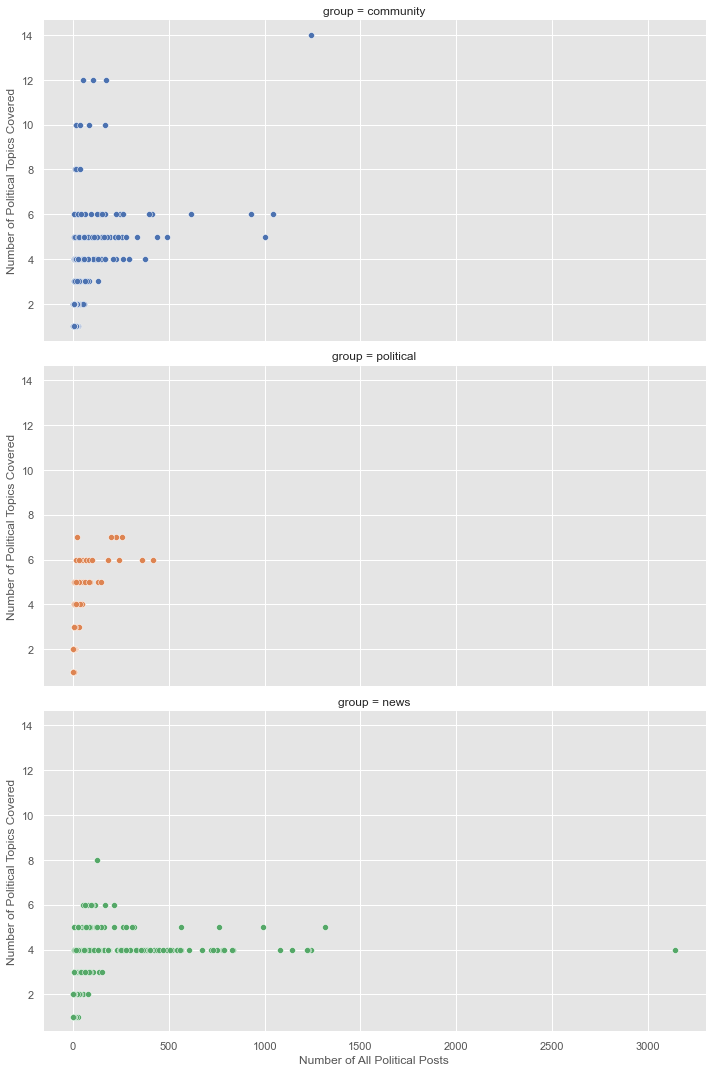

In [33]:
g= sns.FacetGrid(total_type, row = 'group', height=5, aspect =2, hue="group", palette="deep")
g.map(sns.scatterplot,
                "total political posts",
                "total topics covered")
g.set_axis_labels("Number of All Political Posts", "Number of Political Topics Covered")